In [1]:
"""
Jupyter notebook for antisolvent screening.
Solute of the system is 'glutaric acid'.
Solvent of the system is '1-Butanol'.
""";

In [12]:
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

from cosmosac2 import COSMOMolecule, COSMOSAC
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [3]:
# Solute properties
solute = {
    "temp_melt": 370.9,
    "enth_fus": 20700,
    "file": "./cosmo_file/UD1078.cosmo",
    "name": "GLUTARIC_ACID",
}
# Solvent properties
solvent = {
    "temp_melt": 184.552,
    "enth_fus": 9372.16,
    "file": "./cosmo_file/UD34.cosmo",
    "name": "1-BUTANOL",
}

In [5]:
# Load antisolvent data
with open("./data/antisolvent_properties.json", "r") as json_file:
    antisolv_data = json.load(json_file)

Initializing system...
Initialize complete!
Initializing system...
Initialize complete!
Initializing system...
Initialize complete!
Initializing system...
Initialize complete!
Initializing system...
Initialize complete!
Initializing system...
Initialize complete!
Initializing system...
Initialize complete!
Initializing system...
Initialize complete!


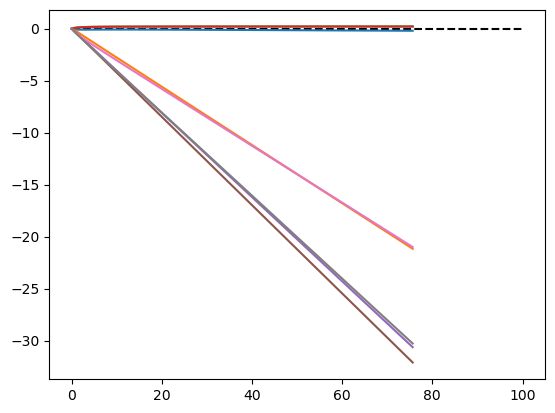

In [6]:
system = tc()
system.add_solute(**solute)
system.add_solvent(**solvent)
fig = plt.figure()
plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
for antisolvent in antisolv_data:
    system.add_antisolvent(**antisolvent)
    antisolv_calculator = ac(system, trace=False)
    result = antisolv_calculator.get_data(
        export="csv", file_name=f"./data/calculate_{antisolvent['name']}.csv"
    )
    plt.plot(
        result["add_antisolv_mole"],
        result["precip_mole"],
        label=f"antisolvent: {system.mole_name[2]}",
    )
    system.clear_antisolvent()

plt.legend(loc="best")
plt.show()

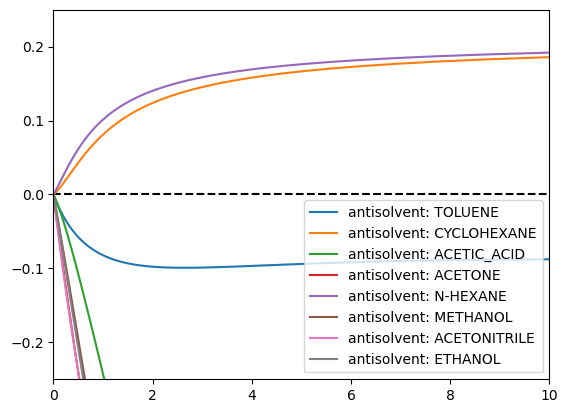

In [19]:
fig2 = plt.figure()
plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
for csv_data_file in os.listdir("./data"):
    if "calculate" in csv_data_file:
        data = pandas.read_csv("./data/" + csv_data_file)
        plt.plot(
            data["add_antisolv_mole"],
            data["precip_mole"],
            label=f"antisolvent: {csv_data_file[10:-4]}",
        )
plt.xlabel("Antisolvent added [mol]")
plt.ylabel("Precipitated solute [mol]")
plt.title(f"Antisolvent screening of solute:{solute['name']}, solvent:{solvent['name']}")
plt.legend(loc="best")
plt.xlim([0, 10])
plt.ylim([-0.25, 0.25])
fig2.savefig("antisolvent_screening.png")
plt.show()